# Neural & Behavioral Modeling - Week 2 (Exercises)
by 李采蓉 b08207042@ntu.edu.tw

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

$$
\begin{align*}
& \dfrac{dR_{J}}{dt}=aR_J+b(J-G)(1-|J-G|)\\
& \dfrac{dJ}{dt}=cR_J(1-|R_J|)+dJ\\
& \dfrac{dR_G}{dt}=aR_G+b(G-J)(1-|G-J|)\\
& \dfrac{dG}{dt}=eR_G(1-|R_G|)+fG\\
\end{align*}
$$

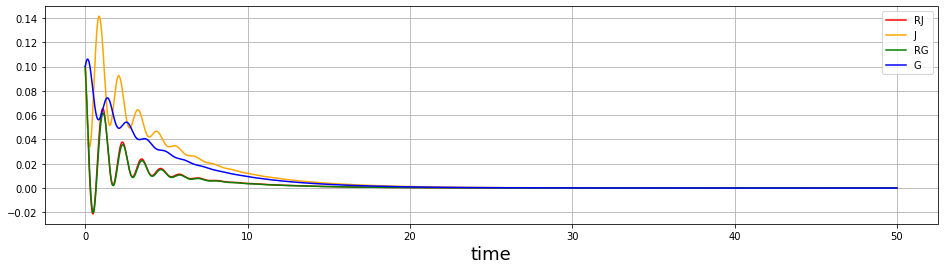

In [2]:
# Write your codes here
a, b, c, d, e, f = -3, 4, -7, 2, 2, -1

# Define parameters

dt = 0.01 # Step size
t = np.arange(0, 50 + dt, dt) # Numerical grid

# Explicit Euler Method
rj = np.zeros(len(t))
rj[0] = 0.1
j = np.zeros(len(t))
j[0] = 0.1
rg = np.zeros(len(t))
rg[0] = 0.1
g = np.zeros(len(t))
g[0] = 0.1

for i in range(0, len(t) - 1):
    rj[i + 1] = rj[i] + dt*(a*rj[i]+b*(j[i]-g[i])*(1-abs(j[i]-g[i])))
    j[i + 1] = j[i] + dt*(c*rj[i]*(1-abs(rj[i]))+d*j[i])
    rg[i + 1] = rj[i] + dt*(a*rg[i]+b*(g[i]-j[i])*(1-abs(g[i]-j[i])))
    g[i + 1] = g[i] + dt*(e*rg[i]*(1-abs(rg[i]))+f*g[i])

figure(figsize = (16, 4))
# Equilibrium line
plot(t, rj, color='r', label='RJ')
plot(t, j, color='orange', label='J')
plot(t, rg, color='green', label='RG')
plot(t, g, color='blue', label='G')
legend()
xlabel('time', fontsize=18)
grid()
show()

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

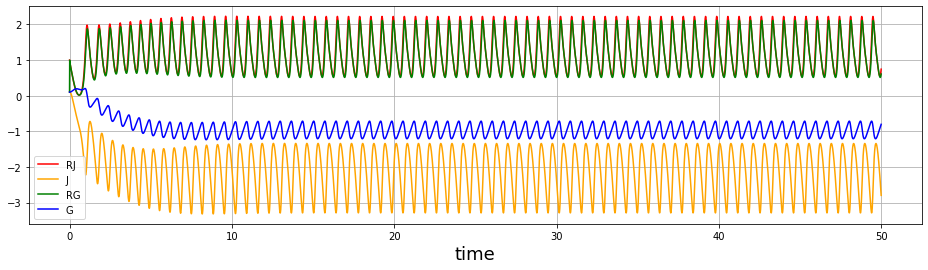

In [3]:
# Run your simulation with the 1st set of initial values here
# Write your codes here
a, b, c, d, e, f = -3, 4, -7, 2, 2, -1

# Define parameters

dt = 0.01 # Step size
t = np.arange(0, 50 + dt, dt) # Numerical grid

# Explicit Euler Method
rj = np.zeros(len(t))
rj[0] = 1
j = np.zeros(len(t))
j[0] = 0.1
rg = np.zeros(len(t))
rg[0] = 0.1
g = np.zeros(len(t))
g[0] = 0.1

for i in range(0, len(t) - 1):
    rj[i + 1] = rj[i] + dt*(a*rj[i]+b*(j[i]-g[i])*(1-abs(j[i]-g[i])))
    j[i + 1] = j[i] + dt*(c*rj[i]*(1-abs(rj[i]))+d*j[i])
    rg[i + 1] = rj[i] + dt*(a*rg[i]+b*(g[i]-j[i])*(1-abs(g[i]-j[i])))
    g[i + 1] = g[i] + dt*(e*rg[i]*(1-abs(rg[i]))+f*g[i])

figure(figsize = (16, 4))
# Equilibrium line
plot(t, rj, color='r', label='RJ')
plot(t, j, color='orange', label='J')
plot(t, rg, color='green', label='RG')
plot(t, g, color='blue', label='G')
legend()
xlabel('time', fontsize=18)
grid()
show()

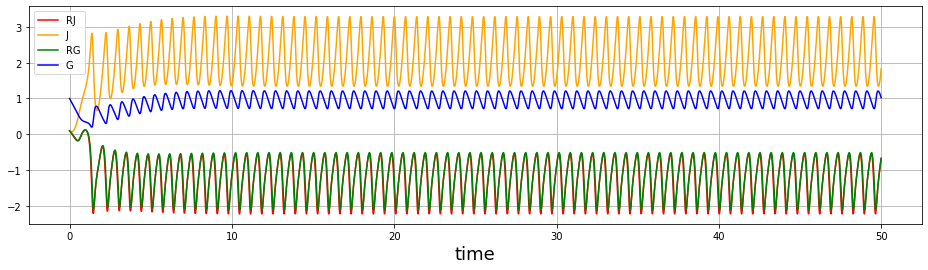

In [4]:
# Run your simulation with the 2nd set of initial values here
# Write your codes here
a, b, c, d, e, f = -3, 4, -7, 2, 2, -1

# Define parameters
dt = 0.01 # Step size
t = np.arange(0, 50 + dt, dt) # Numerical grid

# Explicit Euler Method
rj = np.zeros(len(t))
rj[0] = 0.1
j = np.zeros(len(t))
j[0] = 0.1
rg = np.zeros(len(t))
rg[0] = 0.1
g = np.zeros(len(t))
g[0] = 1

for i in range(0, len(t) - 1):
    rj[i + 1] = rj[i] + dt*(a*rj[i]+b*(j[i]-g[i])*(1-abs(j[i]-g[i])))
    j[i + 1] = j[i] + dt*(c*rj[i]*(1-abs(rj[i]))+d*j[i])
    rg[i + 1] = rj[i] + dt*(a*rg[i]+b*(g[i]-j[i])*(1-abs(g[i]-j[i])))
    g[i + 1] = g[i] + dt*(e*rg[i]*(1-abs(rg[i]))+f*g[i])

figure(figsize = (16, 4))
# Equilibrium line
plot(t, rj, color='r', label='RJ')
plot(t, j, color='orange', label='J')
plot(t, rg, color='green', label='RG')
plot(t, g, color='blue', label='G')
legend()
xlabel('time', fontsize=18)
grid()
show()

## 2 Fix the simulation of "Growth and underinvestment" (5 points)

Although the simulation and explanation of "underinvested growth" seem reasonable, the simulation doesn't appear to describe "sufficiently invested growth" where the performance variable should be able to increase over time. Please do whatever you can to have a model that can simulate both phenomena. 

first performance:  79
last performance:  37.01369654264772


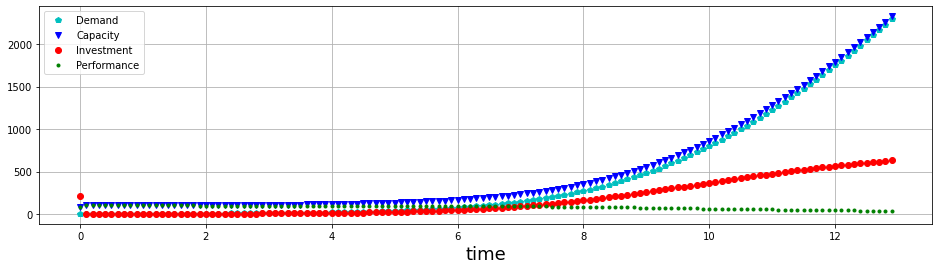

In [321]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=10*(performance_standard-performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
figure(figsize = (16, 4))
grid()
plot(t,Demand[0:-1],'cp')
plot(t,Capacity[0:-1],'bv')
plot(t,inves,'ro')
plot(t,perf,'g.')
xlabel('time', fontsize=18)
legend(['Demand','Capacity','Investment','Performance']);
print("first performance: ", perf[0])
print("last performance: ", perf[-1]) # The final performance

思路：<br>
For $Capacity$,
$$
\begin{aligned}
& \because Capacity2=Capacity1+dt*investment\\
& \therefore investment\ can\ be\ viewed\ as\ the\ first\ derivative\ of\ Capacity.\\
& \Rightarrow \dfrac{dCapacity}{dt}=10*(performance\_standard-performance)
\end{aligned}
$$
As for $Demand$,
$$
\begin{aligned}
& \because Demand2=Demand1+dt*0.75*growing\_action*performance\\
& \therefore (0.75*growing\_action*performance)\ can\ be\ viewed\ as\ the\ first\ derivative\ of\ Demand.\\
& \Rightarrow \dfrac{dDemand}{dt}=0.75*(0.01*Demand1)*performance
\end{aligned}
$$
Owing to $performance=Capacity1-Demand1$, if we want $performance$ to be increasing over time, we need to let $\dfrac{dCapacity}{dt}\geq\dfrac{dDemand}{dt}$, which means that $Capacity$ would have a higher growth rate. In order to achieve this target, we have to decrease the value of $\dfrac{dDemand}{dt}$ or increase the value of $\dfrac{dCapacity}{dt}$.<br>

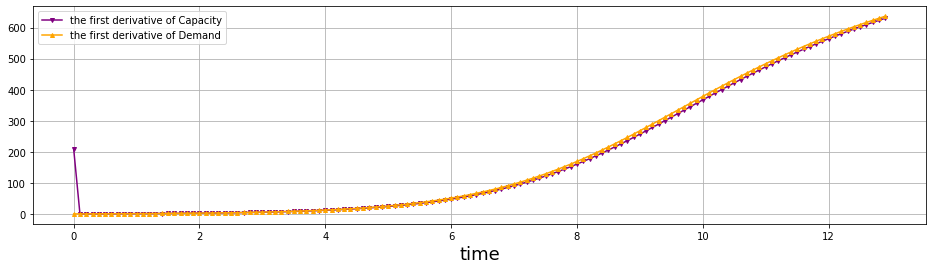

In [322]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
SC, SD, dist=[],[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=10*(performance_standard-performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    SC.append(investment)
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    SD.append(0.75*growing_action*performance)
    dist.append(SD[-1]-SC[-1])
    Capacity.append(Capacity2)
    Demand.append(Demand2)
figure(figsize = (16, 4))
grid()
plot(t,SC,'purple', marker='v', ms=4)
plot(t,SD,'orange', marker='^', ms=4)
xlabel('time', fontsize=18)
legend(['the first derivative of Capacity','the first derivative of Demand'])
# print(perf[-1]) # The final performance

It is pretty obvious that the first derivative of $Demand$ is bigger than the first derivative of $Capacity$, and the distance is increasing most of the time.

At time=1.0, the performance is 99.86841849815372
At time=2.0, the performance is 99.72948421529048
At time=3.0, the performance is 99.4453145917874
At time=4.0, the performance is 98.86870905391672
At time=5.0, the performance is 97.71738604829179
At time=6.0, the performance is 95.49008543636857
At time=7.0, the performance is 91.42993415172865
At time=8.0, the performance is 84.75144250242928
At time=9.0, the performance is 75.33751473042588
At time=10.0, the performance is 64.35050912531756
At time=11.0, the performance is 53.62243482959002
At time=12.0, the performance is 44.4035140395938
At time=13.0, the performance is 37.01369654264772


Text(0.5, 0, 'time')

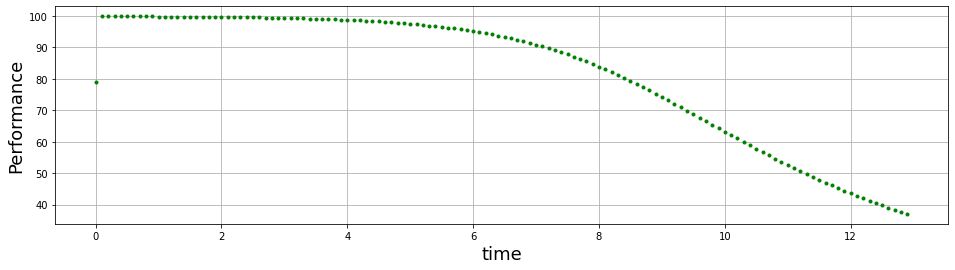

In [325]:
for j in range(131):
    if j!=0:
        if j%10==0: print("At time="+str(j/10)+", the performance is", perf[j-1])
figure(figsize = (16, 4))
grid()
plot(t,perf,'g.')
ylabel('Performance', fontsize=18)
xlabel('time', fontsize=18)

And also $performance$ is decreasing over time.

---
So here is my idea, the simplest way to meet $\dfrac{dCapacity}{dt}\geq\dfrac{dDemand}{dt}$ is to make $\dfrac{dCapacity}{dt}$ and $\dfrac{dDemand}{dt}$ be almost the same but $\dfrac{dCapacity}{dt}$ will be silghtly bigger. That is, we modify our $investment$ strategy.

The original one is
$$
investment=10*(performance_standard-performance)
$$
After the modification,
$$
\begin{aligned}
investment=0.75*growing\_action*(performance\_standard-performance)
\end{aligned}
$$

In [326]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
SC, SD, dist=[],[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    # investment=10*(performance_standard-performance)+dt*Demand1
    investment=0.75*growing_action*(performance_standard-performance)
    # print(performance, investment)
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    SC.append(investment)
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    SD.append(0.75*growing_action*performance)
    dist.append(SD[-1]-SC[-1])
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    # print(Capacity[-1], Demand[-1], Capacity[-2], Demand[-2])
print("first performance: ", perf[0])
print("last performance: ", perf[-1]) # The final performance

first performance:  79
last performance:  50.000000520527806


However, the last $performance$ is much smaller than the first $performance$, so we still need to adjust the equation.

first performance: 79 ; last performance: 50.000000520527806
first performance: 79 ; last performance: 51.612903297543085
first performance: 79 ; last performance: 53.12500000771871
first performance: 79 ; last performance: 54.54545454605778
first performance: 79 ; last performance: 55.88235294120676
first performance: 79 ; last performance: 57.142857142857906
first performance: 79 ; last performance: 58.33333333333337
first performance: 79 ; last performance: 59.45945945945948
first performance: 79 ; last performance: 60.526315789473756
first performance: 79 ; last performance: 61.53846153846155
first performance: 79 ; last performance: 62.5
first performance: 79 ; last performance: 63.41463414634143
first performance: 79 ; last performance: 64.28571428571433
first performance: 79 ; last performance: 65.11627906976742
first performance: 79 ; last performance: 65.90909090909088
first performance: 79 ; last performance: 66.66666666666663
first performance: 79 ; last performance: 67.3913

Text(0, 0.5, 'last perf-first perf')

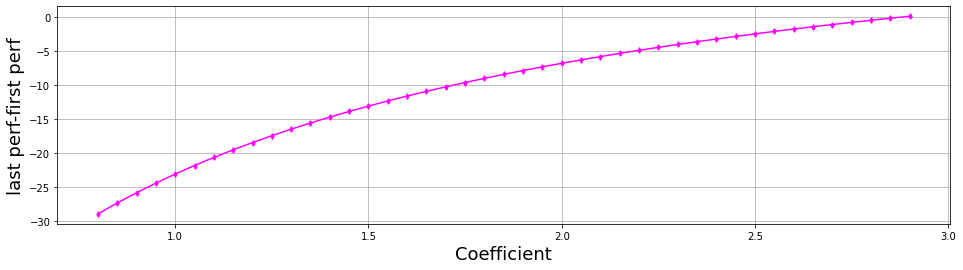

In [337]:
performance_standard=100 # Model parameter
x, result=[],[]
a=0
while(1):
    Capacity,Demand=[80],[1] # Initial values
    dt=.1 # step size for numerical integration
    t=arange(0,13,dt) # integration period
    perf,inves=[],[]
    for i in t:
        Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
        performance=Capacity1-Demand1 # net gains
        perf.append(performance)
        growing_action=0.01*Demand1 # more demands -> grow the company
        investment=(0.75+0.05*a)*growing_action*(performance_standard-performance)
        inves.append(investment)
        Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
        Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
        Capacity.append(Capacity2)
        Demand.append(Demand2)
    a+=1
    print("first performance:", perf[0], "; last performance:",perf[-1])
    x.append(0.75+0.05*a)
    result.append(perf[-1]-perf[0])
    if(perf[-1]>perf[0]): break
figure(figsize = (16, 4))
grid()
plot(x, result,'magenta', marker='d', ms=4)
xlabel('Coefficient', fontsize=18)
ylabel('last perf-first perf', fontsize=18)

From the above result, we can tell that as long as we keep increase the coefficient, the first $performance$ is much smaller than the last $performance$ in the end. To let the final result more clearly, I chose 3.6 as the coefficient instead.

In [2]:
# Write your working simulation here
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,13,dt) # integration period
perf,inves=[],[]
SC, SD, dist=[],[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    # investment=10*(performance_standard-performance)+dt*Demand1
    investment=3.6*growing_action*(performance_standard-performance)
    # print(performance, investment)
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    SC.append(investment)
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    SD.append(0.75*growing_action*performance)
    dist.append(SD[-1]-SC[-1])
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    # print(Capacity[-1], Demand[-1], Capacity[-2], Demand[-2])
print("first performance: ", perf[0])
print("last performance: ", perf[-1]) # The final performance

first performance:  79
last performance:  82.84413221669365


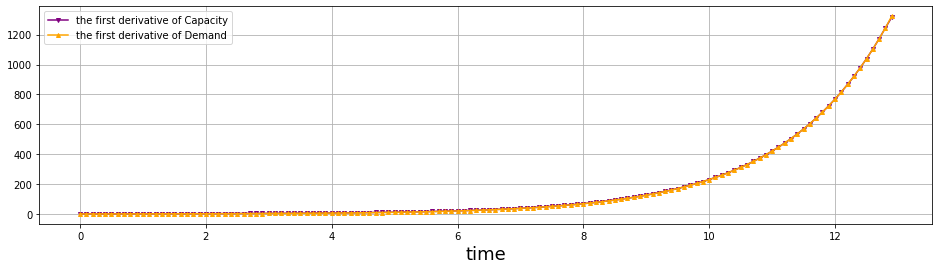

In [3]:
figure(figsize = (16, 4))
grid()
plot(t,SC,'purple', marker='v', ms=4)
plot(t,SD,'orange', marker='^', ms=4)
xlabel('time', fontsize=18)
legend(['the first derivative of Capacity','the first derivative of Demand'])

It's hard to tell whether $performance$ is an increasing function, so I plotted another picture.

At time=1.0, the performance is 79.1832408870859
At time=2.0, the performance is 79.51222807748657
At time=3.0, the performance is 80.02778942508996
At time=4.0, the performance is 80.75960499710587
At time=5.0, the performance is 81.62697414208604
At time=6.0, the performance is 82.36508624027998
At time=7.0, the performance is 82.70632708206527
At time=8.0, the performance is 82.75773554587747
At time=9.0, the performance is 82.75862063736994
At time=10.0, the performance is 82.75862068965517
At time=11.0, the performance is 82.75862068965534
At time=12.0, the performance is 82.75862069231403
At time=13.0, the performance is 82.84413221669365


Text(0, 0.5, 'Performance')

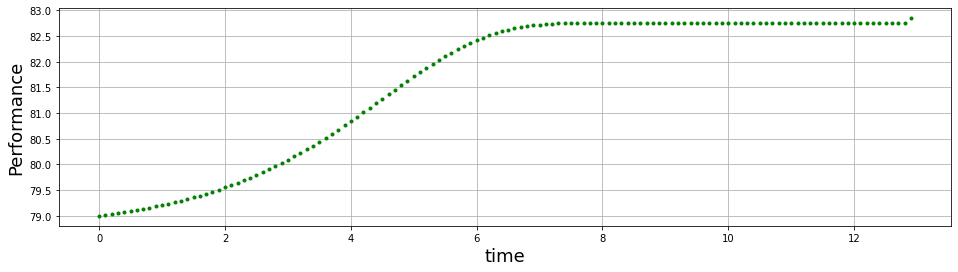

In [4]:
for j in range(131):
    if j!=0:
        if j%10==0: print("At time="+str(j/10)+", the performance is", perf[j-1])
figure(figsize = (16, 4))
grid()
plot(t,perf,'g.', label='Performance')
xlabel('time', fontsize=18)
ylabel('Performance', fontsize=18)

From the above picture, it is so obvious that $performance$ is increasing over time (even though the changing is actually quite small).

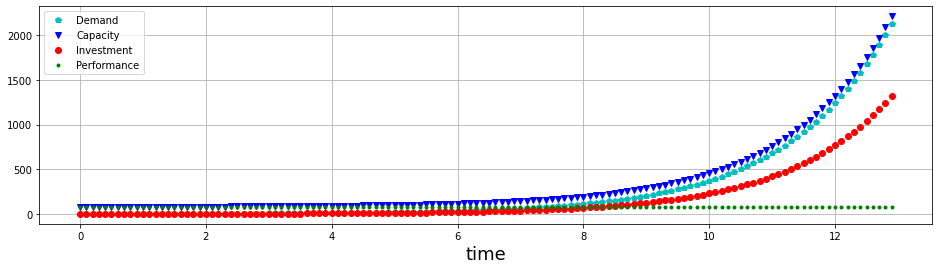

In [5]:
figure(figsize = (16, 4))
grid()
plot(t,Demand[0:-1],'cp', label='Demand')
plot(t,Capacity[0:-1],'bv', label='Capacity')
plot(t,inves,'ro', label='Investment')
plot(t,perf,'g.', label='Performance')
xlabel('time', fontsize=18)
legend();